# Load Libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [3]:
#check out the matplotlib 'styles'#check 
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# Load the Data

In [4]:
# Load the Data 
link = 'https://raw.githubusercontent.com/Amberlynnyandow/study-group-content/master/module_1/week_3_PT/data.csv'
df = pd.read_csv(link)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# Get information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


# Scrub the data
* Do we have missing values? <br />
* Do we need to change any of our dtypes? <br />
* How about the column names? <br />
 - No Spaces 
 - No Special Charaters 
* Should we drop any columns? <br />
* Are there duplicates? Missing or Null values? <br />
* Check for outliers.

In [9]:
# rename columns
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [12]:
# checking for duplicates and drop if any
dup_row_df = df[df.duplicated()]
print(dup_row_df.shape, df.shape)

(715, 16) (11914, 16)


In [13]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11199 non-null object
Model                11199 non-null object
Year                 11199 non-null int64
Engine_Fuel_Type     11196 non-null object
Engine_HP            11130 non-null float64
Engine_Cylinders     11169 non-null float64
Transmission_Type    11199 non-null object
Driven_Wheels        11199 non-null object
Number_of_Doors      11193 non-null float64
Market_Category      7823 non-null object
Vehicle_Size         11199 non-null object
Vehicle_Style        11199 non-null object
highway_MPG          11199 non-null int64
city_mpg             11199 non-null int64
Popularity           11199 non-null int64
MSRP                 11199 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [14]:
# are there any missing rows? Deal with them.
print(df.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_HP              69
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3376
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [15]:
# A solution for missing rows: Replace with median/mode/mean
# Median vs mean: the skewness may shift the mean
# For the current dataset, let's drop those for now
df = df.dropna()
print(df.isnull().sum())

Make                 0
Model                0
Year                 0
Engine_Fuel_Type     0
Engine_HP            0
Engine_Cylinders     0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      0
Market_Category      0
Vehicle_Size         0
Vehicle_Style        0
highway_MPG          0
city_mpg             0
Popularity           0
MSRP                 0
dtype: int64


# Exploratory Data Analysis
* summarize main characteristics of the data
* gain better understanding of the data-set,
* uncover relationships between different variables, and
* extract important variables for the problem we are trying to solve
#### 4.0.1 Helpful methods include:
* unique()
* value_counts()

In [16]:
# View descriptive Stats
df.describe()

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,MSRP
count,7735.00000,7735.000000,7735.000000,7735.000000,7735.00000,7735.000000,7735.000000,7.735000e+03
mean,2012.14958,277.632062,5.825469,3.421332,26.52980,19.468649,1513.098772,5.102826e+04
std,6.23167,115.529955,1.895593,0.895054,7.78492,7.231534,1429.197317,7.153777e+04
min,1990.00000,55.000000,0.000000,2.000000,12.00000,7.000000,2.000000,2.000000e+03
25%,2010.00000,194.000000,4.000000,2.000000,22.00000,16.000000,520.000000,2.622500e+04
50%,2015.00000,270.000000,6.000000,4.000000,26.00000,18.000000,1013.000000,3.560000e+04
75%,2016.00000,325.000000,6.000000,4.000000,30.00000,22.000000,2009.000000,4.947750e+04
max,2017.00000,1001.000000,16.000000,4.000000,354.00000,137.000000,5657.000000,2.065902e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121df7978>,
      dtype=object)

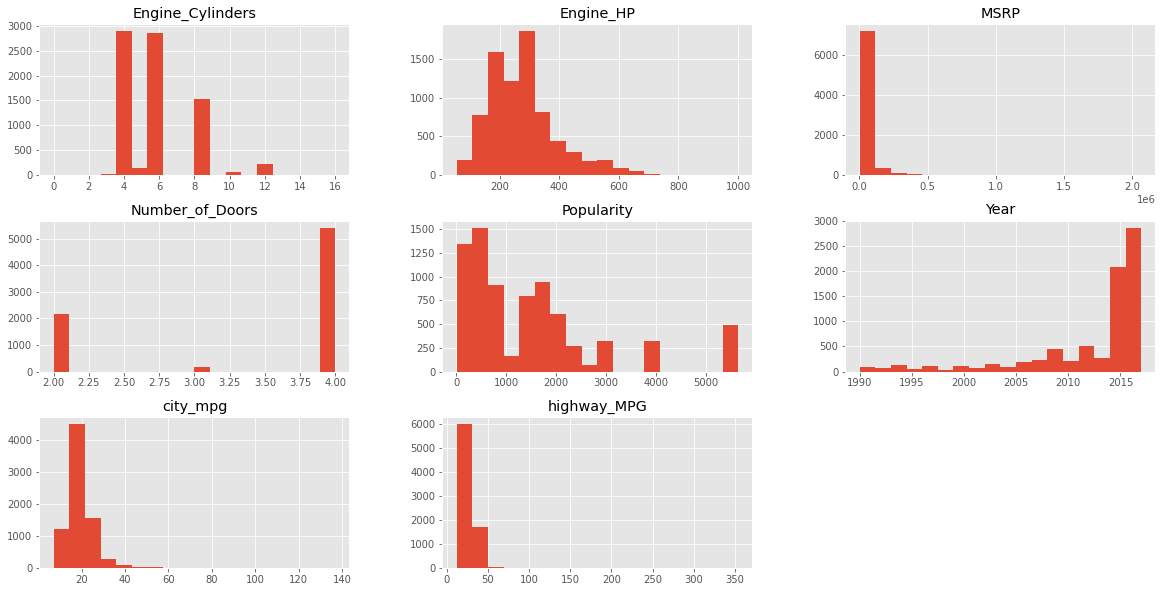

In [28]:
# View histograms of every column
df.hist(figsize=(20,10), bins = 18)

# Groupby
The “groupby” method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

In [32]:
#What type of driven wheel is most valuable?
df.Driven_Wheels.value_counts()

front wheel drive    2625
rear wheel drive     2360
all wheel drive      2114
four wheel drive      636
Name: Driven_Wheels, dtype: int64

In [35]:
# Drive wheels vs price
df_group_drive = df.groupby('Driven_Wheels')['MSRP'].mean()
df_group_drive

Driven_Wheels
all wheel drive      61444.405393
four wheel drive     48740.482704
front wheel drive    25924.110476
rear wheel drive     70237.459322
Name: MSRP, dtype: float64

In [37]:
df_group_new = df.groupby(['Driven_Wheels', 'Vehicle_Style'])['MSRP'].mean()
df_group_new

Driven_Wheels      Vehicle_Style      
all wheel drive    2dr Hatchback            9240.800000
                   2dr SUV                 35551.363636
                   4dr Hatchback           32012.200000
                   4dr SUV                 41034.702845
                   Cargo Van               32760.000000
                   Convertible            167234.000000
                   Convertible SUV         47975.000000
                   Coupe                  154467.195876
                   Crew Cab Pickup         39509.074074
                   Passenger Van           34525.000000
                   Regular Cab Pickup       5667.000000
                   Sedan                   58154.445633
                   Wagon                   38565.578231
four wheel drive   2dr Hatchback            2000.000000
                   2dr SUV                 32704.666667
                   4dr Hatchback            2000.000000
                   4dr SUV                 64061.054608
         